In [ ]:
import pandas as pd
import numpy as np
import random
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import plotly.express as px
import matplotlib.pyplot as plt
import base64
from IPython.display import HTML

In [ ]:
finaldata = pd.read_csv("finaldata.csv")

In [ ]:
finaldata

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
1,91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
2,420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
3,554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
4,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
824,96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
825,277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
826,582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S


**Data Preparation**

In [ ]:
finaldata['Sex'].replace(['male', 'female'],[1,2], inplace=True)
finaldata['Embarked'].replace(['S','Q', 'C'], [1,2,3], inplace=True)
finaldata.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",2,39.0,1,5,347082,31.2750,NaN,1.0
1,91,92,0,3,"Andreasson, Mr. Paul Edvin",1,20.0,0,0,347466,7.8542,NaN,1.0
2,420,421,0,3,"Gheorgheff, Mr. Stanio",1,NaN,0,0,349254,7.8958,NaN,3.0
3,554,555,1,3,"Ohman, Miss. Velin",2,22.0,0,0,347085,7.7750,NaN,1.0
4,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",2,4.0,1,1,PP 9549,16.7000,G6,1.0
5,20,21,0,2,"Fynney, Mr. Joseph J",1,35.0,0,0,239865,26.0000,NaN,1.0
6,80,81,0,3,"Waelens, Mr. Achille",1,22.0,0,0,345767,9.0000,NaN,1.0
7,368,369,1,3,"Jermyn, Miss. Annie",2,NaN,0,0,14313,7.7500,NaN,2.0
8,878,879,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,1.0
9,475,476,0,1,"Clifford, Mr. George Quincy",1,NaN,0,0,110465,52.0000,A14,1.0


**Exploratory Data Analysis**

In [ ]:
finaldata['Sex'].replace(['male', 'female'], [1,2], inplace = True)
finaldata['Embarked'].replace(['S', 'Q', 'C'], [1, 2, 3,], inplace = True)

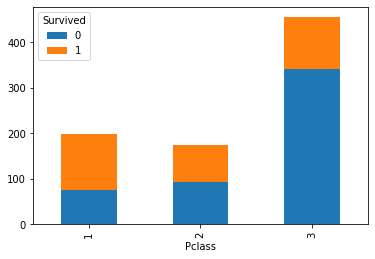

In [ ]:
crosstab_01 = pd.crosstab(finaldata['Pclass'], finaldata['Survived'])
crosstab_01.plot(kind = 'bar', stacked = True)

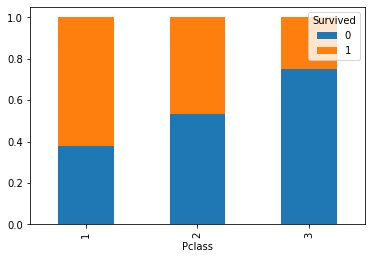

In [ ]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True)

Based on the standard and normalized bar graphs we can infer that passengers with a higher passenger class have a smaller chance at survival.

In [ ]:
Age0 = finaldata[finaldata.Survived == 0]['Age']
Age1 = finaldata[finaldata.Survived == 1]['Age']

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


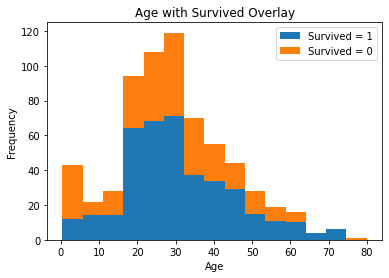

In [ ]:
plt.hist([Age0, Age1], bins = 15, stacked = True)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.title('Age with Survived Overlay')
plt.xlabel('Age');
plt.ylabel('Frequency');

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


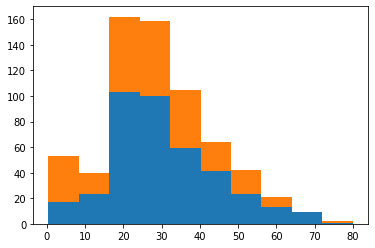

In [ ]:
(y, bins, bars) = plt.hist([Age0, Age1], bins = 10, stacked = True, )
y_table = np.column_stack((y[0], y[1]))
y_table / y_table.sum(axis=1)[:, None]
y_norm = y_table / y_table.sum(axis=1)[:, None]
final_bins = np.column_stack((bins[0:10], bins[1:11]))

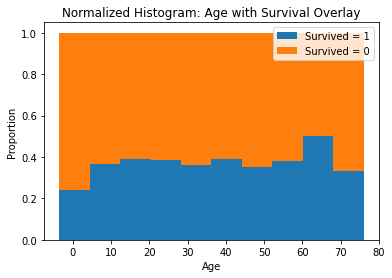

In [ ]:
plot_x = plt.bar(x = final_bins[:,0], height = y_norm[:,0], width = final_bins[:, 1] - final_bins[:, 0])
plot_y = plt.bar(x = final_bins[:,0], height = y_norm[:,1], width = final_bins[:, 1] - final_bins[:, 0],
bottom = y_norm[:,0])
plt.legend(['Survived = 1', 'Survived = 0'])
plt.title('Normalized Histogram: Age with Survival Overlay')
plt.xlabel('Age');
plt.ylabel('Proportion');
plt.show()

Based on the standard and normalized histograms we can infer that the older the passengers are, the less chance of survival they have.

**Data Partition**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats.distributions as distr
import numpy as np
import statistics

In [ ]:
data_train, data_test = train_test_split(finaldata, test_size = 0.20, random_state = 4421138)

In [ ]:
data_train.shape

(662, 13)

In [ ]:
data_test.shape

(166, 13)

In [ ]:
data_train['Age'].mean()

29.324849056603774

In [ ]:
data_train['Age'].median()

28.0

In [ ]:
data_train['Age'].mode()

0    22.0
dtype: float64

In [ ]:
data_test['Age'].mean()

30.893700787401574

In [ ]:
data_test['Age'].median()

29.0

In [ ]:
data_test['Age'].mode()

0    24.0
dtype: float64

In [ ]:
Age0 = data_test[data_test.Survived == 0]['Age']
Age1 = data_test[data_test.Survived == 1]['Age']

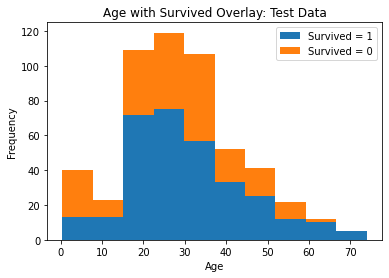

In [ ]:
plt.hist([Age0, Age1], bins = 10, stacked = True)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.title('Age with Survived Overlay: Test Data')
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.show()

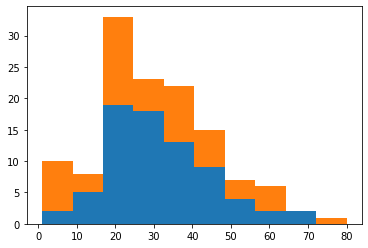

In [ ]:
(y, bins, bars) = plt.hist([Age0, Age1], bins = 10, stacked = True, )
y_table = np.column_stack((y[0], y[1]))
y_table / y_table.sum(axis=1)[:, None]
y_norm = y_table / y_table.sum(axis=1)[:, None]
final_bins = np.column_stack((bins[0:10], bins[1:11]))

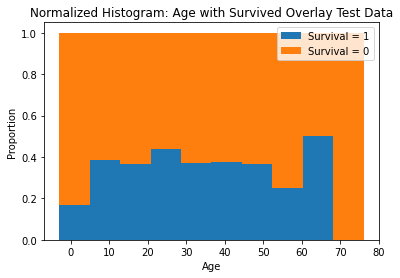

In [ ]:
plot_x = plt.bar(x = final_bins[:,0], height = y_norm[:,0], width = final_bins[:, 1] - final_bins[:, 0])
plot_y = plt.bar(x = final_bins[:,0], height = y_norm[:,1], width = final_bins[:, 1] - final_bins[:, 0],
bottom = y_norm[:,0])
plt.legend(['Survival = 1', 'Survival = 0'])
plt.title('Normalized Histogram: Age with Survived Overlay Test Data')
plt.xlabel('Age');
plt.ylabel('Proportion');
plt.show()

In [ ]:
Age0 = data_train[data_train.Survived == 0]['Age']
Age1 = data_train[data_train.Survived == 1]['Age']

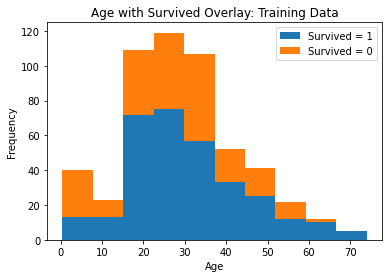

In [ ]:
plt.hist([Age0, Age1], bins = 10, stacked = True)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.title('Age with Survived Overlay: Training Data')
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.show()

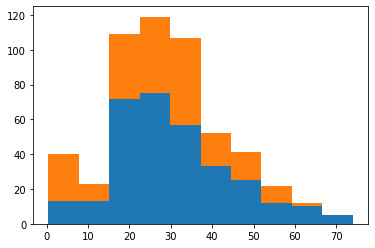

In [ ]:
(y, bins, bars) = plt.hist([Age0, Age1], bins = 10, stacked = True, )
y_table = np.column_stack((y[0], y[1]))
y_table / y_table.sum(axis=1)[:, None]
y_norm = y_table / y_table.sum(axis=1)[:, None]
final_bins = np.column_stack((bins[0:10], bins[1:11]))

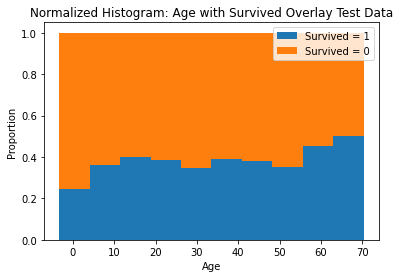

In [ ]:
plot_x = plt.bar(x = final_bins[:,0], height = y_norm[:,0], width = final_bins[:, 1] - final_bins[:, 0])
plot_y = plt.bar(x = final_bins[:,0], height = y_norm[:,1], width = final_bins[:, 1] - final_bins[:, 0],
bottom = y_norm[:,0])
plt.legend(['Survived = 1', 'Survived = 0'])
plt.title('Normalized Histogram: Age with Survived Overlay Test Data')
plt.xlabel('Age');
plt.ylabel('Proportion');
plt.show()

In [ ]:
data_train.shape[0]

662

In [ ]:
data_train['Survived'].value_counts()

0    406
1    256
Name: Survived, dtype: int64

**Decision Tree**

In [ ]:
a = data_train[['Survived']]
data_train['Sex'].replace(['male', 'female'],[1, 2], inplace = True)
data_train['Embarked'].replace(['S', 'C', 'Q'],[1, 2, 3], inplace = True)
data_train[data_train.Age.isnull()]
data_train = data_train.dropna()
data_train.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
511,137,138,0,1,"Futrelle, Mr. Jacques Heath",1,37.0,1,0,113803,53.1000,C123,1.0
266,625,626,0,1,"Sutton, Mr. Frederick",1,61.0,0,0,36963,32.3208,D50,1.0
211,772,773,0,2,"Mack, Mrs. (Mary)",2,57.0,0,0,S.O./P.P. 3,10.5000,E77,1.0
593,345,346,1,2,"Brown, Miss. Amelia ""Mildred""",2,24.0,0,0,248733,13.0000,F33,1.0
519,504,505,1,1,"Maioni, Miss. Roberta",2,16.0,0,0,110152,86.5000,B79,1.0
49,835,836,1,1,"Compton, Miss. Sara Rebecca",2,39.0,1,1,PC 17756,83.1583,E49,3.0
377,867,868,0,1,"Roebling, Mr. Washington Augustus II",1,31.0,0,0,PC 17590,50.4958,A24,1.0
50,730,731,1,1,"Allen, Miss. Elisabeth Walton",2,29.0,0,0,24160,211.3375,B5,1.0
674,583,584,0,1,"Ross, Mr. John Hugo",1,36.0,0,0,13049,40.1250,A10,3.0
352,748,749,0,1,"Marvin, Mr. Daniel Warner",1,19.0,1,0,113773,53.1000,D30,1.0


In [ ]:
a = data_train[['Survived']]
var_sex = np.array(data_train['Sex'])
(sex_categorial, sex_categorial_np) = stattools.categorical(var_sex, drop = True, dictnames = True)
sex_categorial_np

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


{0: 1, 1: 2}

[Text(0.6, 0.9, "Sex <= 1.5\ngini = 0.443\nsamples = 142\nvalue = [47, 95]\nclass = Didn't Survive"),
 Text(0.4, 0.7, 'Age <= 18.0\ngini = 0.493\nsamples = 77\nvalue = [43, 34]\nclass = Survived'),
 Text(0.2, 0.5, "gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Didn't Survive"),
 Text(0.6, 0.5, 'Age <= 60.5\ngini = 0.474\nsamples = 70\nvalue = [43, 27]\nclass = Survived'),
 Text(0.4, 0.3, 'Age <= 24.5\ngini = 0.49\nsamples = 63\nvalue = [36, 27]\nclass = Survived'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Survived'),
 Text(0.6, 0.1, 'gini = 0.498\nsamples = 58\nvalue = [31, 27]\nclass = Survived'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Survived'),
 Text(0.8, 0.7, "gini = 0.116\nsamples = 65\nvalue = [4, 61]\nclass = Didn't Survive")]

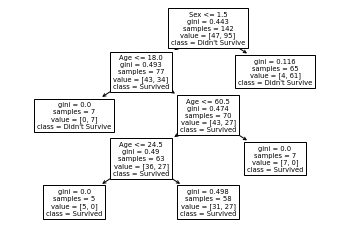

In [ ]:
sex_categorial_pd = pd.DataFrame(sex_categorial)
b = data_train[['Age', 'Sex']]
var_b = ["Age", "Sex"]
var_a = ["Survived", "Didn't Survive"]
var_cart = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5).fit(b,a)
export_graphviz(var_cart, out_file = "var_cart.dot", feature_names = var_b, class_names = var_a)
plot_tree(var_cart, feature_names = var_b, class_names = var_a)

[Text(0.6, 0.9, "Sex <= 1.5\ngini = 0.443\nsamples = 142\nvalue = [47, 95]\nclass = Didn't Survive"),
 Text(0.4, 0.7, 'Age <= 18.0\ngini = 0.493\nsamples = 77\nvalue = [43, 34]\nclass = Survived'),
 Text(0.2, 0.5, "gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Didn't Survive"),
 Text(0.6, 0.5, 'Age <= 60.5\ngini = 0.474\nsamples = 70\nvalue = [43, 27]\nclass = Survived'),
 Text(0.4, 0.3, 'Age <= 24.5\ngini = 0.49\nsamples = 63\nvalue = [36, 27]\nclass = Survived'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Survived'),
 Text(0.6, 0.1, 'gini = 0.498\nsamples = 58\nvalue = [31, 27]\nclass = Survived'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Survived'),
 Text(0.8, 0.7, "gini = 0.116\nsamples = 65\nvalue = [4, 61]\nclass = Didn't Survive")]

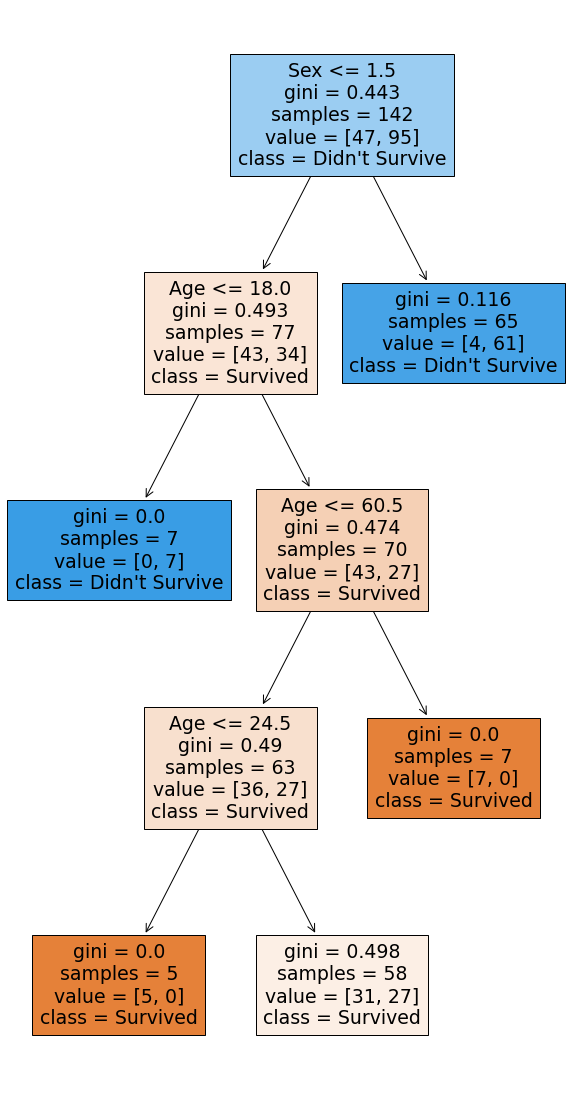

In [ ]:
tree = plt.figure(figsize = (10,20))
plot_tree(var_cart, feature_names = var_b, class_names = var_a, filled = True)

[Text(0.6, 0.9, "Sex <= 1.5\ngini = 0.443\nsamples = 142\nvalue = [47, 95]\nclass = Didn't Survive"),
 Text(0.4, 0.7, 'Age <= 18.0\ngini = 0.493\nsamples = 77\nvalue = [43, 34]\nclass = Survived'),
 Text(0.2, 0.5, "gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Didn't Survive"),
 Text(0.6, 0.5, 'Age <= 60.5\ngini = 0.474\nsamples = 70\nvalue = [43, 27]\nclass = Survived'),
 Text(0.4, 0.3, 'Fare <= 7.85\ngini = 0.49\nsamples = 63\nvalue = [36, 27]\nclass = Survived'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Survived'),
 Text(0.6, 0.1, 'gini = 0.499\nsamples = 57\nvalue = [30, 27]\nclass = Survived'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Survived'),
 Text(0.8, 0.7, "gini = 0.116\nsamples = 65\nvalue = [4, 61]\nclass = Didn't Survive")]

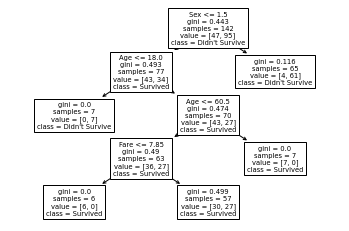

In [ ]:
a1 = data_train[['Survived']]
b1 = data_train[['Pclass', 'Age', 'Fare', 'Sex']]
a1_names = ["Survived", "Didn't Survive"]
b1_names = ["Pclass","Age","Fare","Sex"]
var_cart1 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5).fit(b1,a1)
export_graphviz(var_cart1, out_file = "var_cart1.dot", feature_names = b1_names, class_names = a1_names)
plot_tree(var_cart1, feature_names = b1_names, class_names = a1_names)

[Text(0.6, 0.9, "Sex <= 1.5\ngini = 0.443\nsamples = 142\nvalue = [47, 95]\nclass = Didn't Survive"),
 Text(0.4, 0.7, 'Age <= 18.0\ngini = 0.493\nsamples = 77\nvalue = [43, 34]\nclass = Survived'),
 Text(0.2, 0.5, "gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Didn't Survive"),
 Text(0.6, 0.5, 'Age <= 60.5\ngini = 0.474\nsamples = 70\nvalue = [43, 27]\nclass = Survived'),
 Text(0.4, 0.3, 'Fare <= 7.85\ngini = 0.49\nsamples = 63\nvalue = [36, 27]\nclass = Survived'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Survived'),
 Text(0.6, 0.1, 'gini = 0.499\nsamples = 57\nvalue = [30, 27]\nclass = Survived'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Survived'),
 Text(0.8, 0.7, "gini = 0.116\nsamples = 65\nvalue = [4, 61]\nclass = Didn't Survive")]

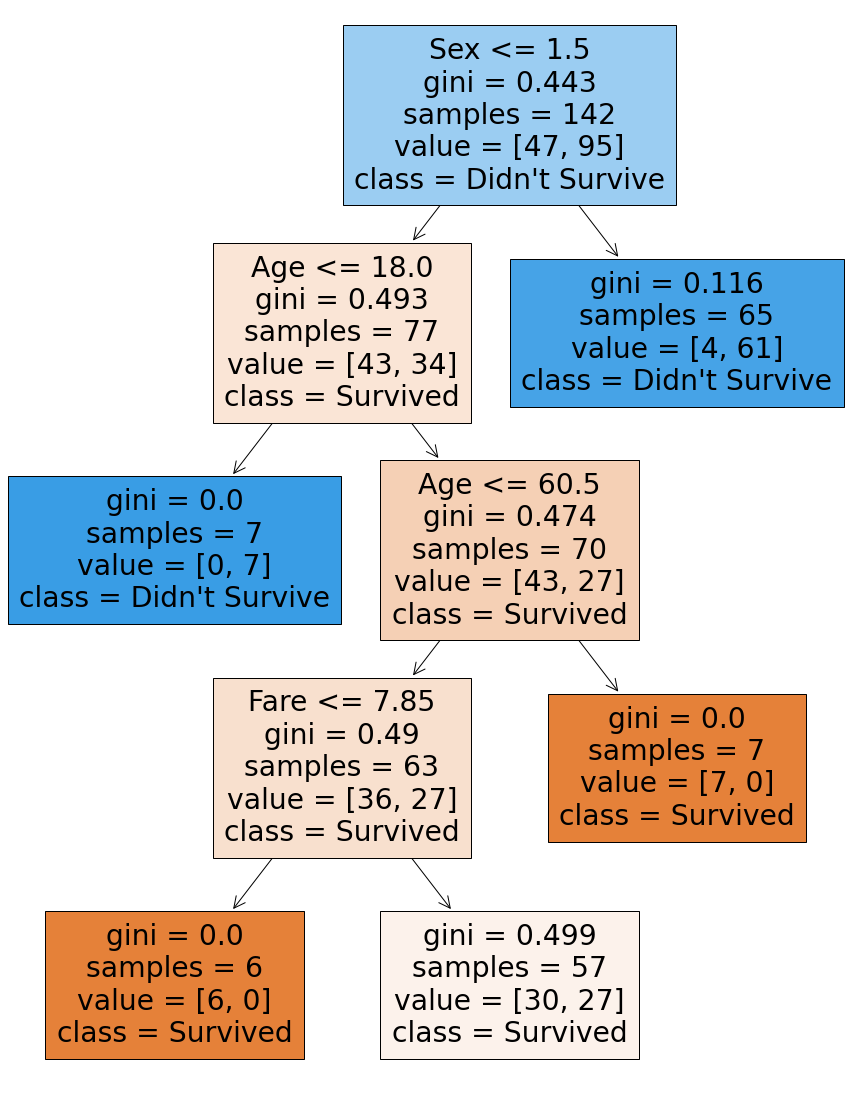

In [ ]:
tree = plt.figure(figsize = (15,20))
plot_tree(var_cart1, feature_names = b1_names, class_names = a1_names, filled = True)

[Text(0.6, 0.9, "Parch <= 1.5\ngini = 0.443\nsamples = 142\nvalue = [47, 95]\nclass = Didn't Survive"),
 Text(0.4, 0.7, 'SibSp <= 18.0\ngini = 0.493\nsamples = 77\nvalue = [43, 34]\nclass = Survived'),
 Text(0.2, 0.5, "gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Didn't Survive"),
 Text(0.6, 0.5, 'SibSp <= 60.5\ngini = 0.474\nsamples = 70\nvalue = [43, 27]\nclass = Survived'),
 Text(0.4, 0.3, 'SibSp <= 24.5\ngini = 0.49\nsamples = 63\nvalue = [36, 27]\nclass = Survived'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Survived'),
 Text(0.6, 0.1, 'gini = 0.498\nsamples = 58\nvalue = [31, 27]\nclass = Survived'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Survived'),
 Text(0.8, 0.7, "gini = 0.116\nsamples = 65\nvalue = [4, 61]\nclass = Didn't Survive")]

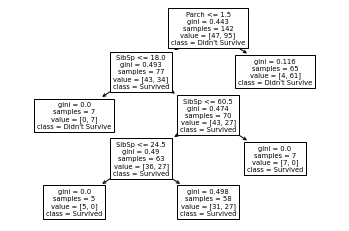

In [ ]:
a2 = data_train[['Survived']]
b2 = data_train[['SibSp', 'Parch', 'Embarked']]
a2_names = ["Survived", "Didn't Survive"]
b2_names = ["SibSp","Parch","Embarked"]
var_cart2 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5).fit(b2,a2)
export_graphviz(var_cart2, out_file = "var_cart2.dot", feature_names = b2_names, class_names = a2_names)
plot_tree(var_cart, feature_names = b2_names, class_names = a2_names)

[Text(0.5, 0.875, "Embarked <= 2.0\ngini = 0.443\nsamples = 142\nvalue = [47, 95]\nclass = Didn't Survive"),
 Text(0.25, 0.625, "Parch <= 0.5\ngini = 0.472\nsamples = 89\nvalue = [34, 55]\nclass = Didn't Survive"),
 Text(0.125, 0.375, "gini = 0.497\nsamples = 61\nvalue = [28, 33]\nclass = Didn't Survive"),
 Text(0.375, 0.375, "Parch <= 3.0\ngini = 0.337\nsamples = 28\nvalue = [6, 22]\nclass = Didn't Survive"),
 Text(0.25, 0.125, "gini = 0.302\nsamples = 27\nvalue = [5, 22]\nclass = Didn't Survive"),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Survived'),
 Text(0.75, 0.625, "SibSp <= 0.5\ngini = 0.37\nsamples = 53\nvalue = [13, 40]\nclass = Didn't Survive"),
 Text(0.625, 0.375, "gini = 0.458\nsamples = 31\nvalue = [11, 20]\nclass = Didn't Survive"),
 Text(0.875, 0.375, "gini = 0.165\nsamples = 22\nvalue = [2, 20]\nclass = Didn't Survive")]

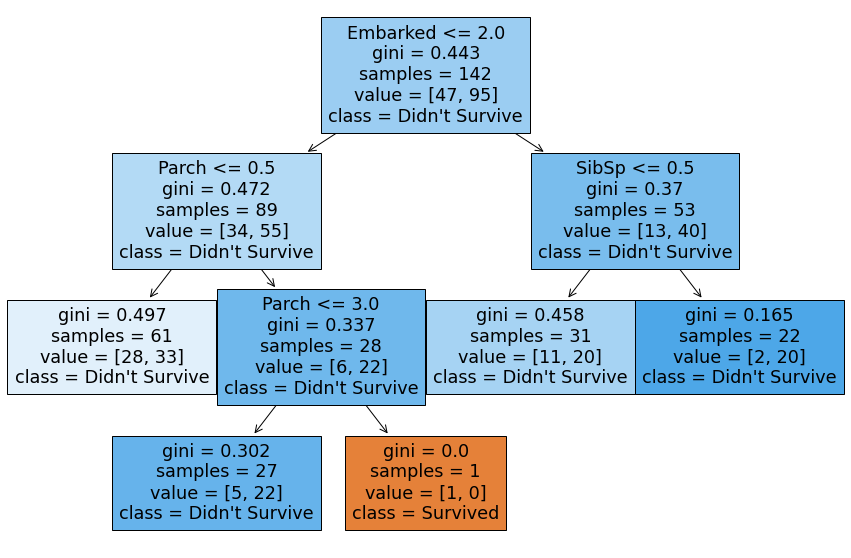

In [ ]:
tree = plt.figure(figsize = (15,10))
plot_tree(var_cart2, feature_names = b2_names, class_names = a2_names, filled = True)